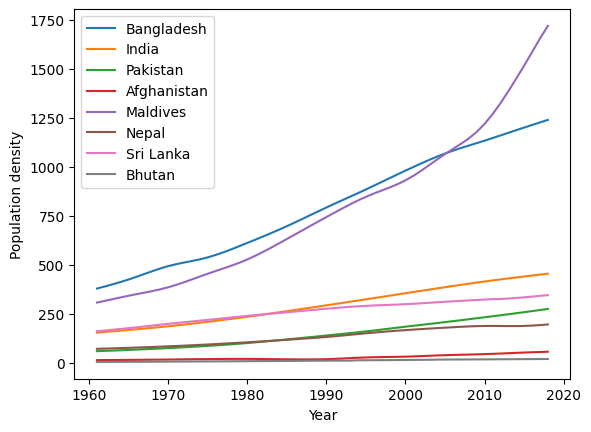

In [17]:
#Below analysis is to compare the population density for countries in a specific region according to the data in excel file
"""Working: 
  get_populationdensity_years(), this function takes a region as input parameter and returns a dictionary of dictionaries for each countries and representing their population densities through years 1960 to 2018. Below example
  dict = {
    "India" : {
      "1960": 654.33
    },
    "Srilanka": {
      "1960": 432.21
    }
  }
  The inside dictionary is returned by the function get_country_data() which takes the input parameter as name of each country and returns a dictionary of its population density from 1960 to 2018
  Finally in plot_graph function we pass the the value that we got from get_populationdendsity_years
"""
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

#importing the excel file
excel_data = pd.read_excel('D:\\Python\\da-project\\world-economic-indicator-project\\dataset\\WorldBank.xlsx')
plt.figure()
def get_country_data(country, data):
  output = {}
  country_data = data.loc[data['Country Name'] == country, ['Year','Population density (people per sq. km of land area)']]
  country_data.sort_values('Year', inplace=True)
  for i, row in country_data.iterrows():
    output[row['Year']] = row['Population density (people per sq. km of land area)']
  return output

  
def get_populationdensity_years(region, data):
  data = excel_data.loc[excel_data['Region'] == region]
  countries = list(set(data['Country Name'].tolist())) #to get unique names of countries in region
  output = {} #we will return this dict with data for each country in region
  for name in countries:
    output[name] = get_country_data(name, data)
  return output

def plot_graph(data):
  for country, info in data.items():
    years = list(info.keys())
    density = list(info.values())
    plt.plot(years, density, label=country)

  plt.xlabel('Year')
  plt.ylabel('Population density')

  plt.legend()
  plt.show()
#comparison of south asian countries
graph_south_asia = plot_graph(get_populationdensity_years('South Asia', excel_data))

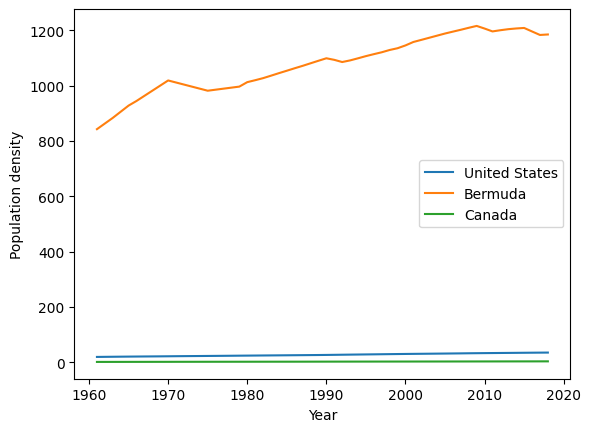

In [18]:
graph_north_america = plot_graph(get_populationdensity_years('North America', excel_data))